In [1]:
import EntropyHub as EH
print("EntropyHub imported successfully!")


EntropyHub imported successfully!


In [2]:
import pandas as pd
import xlrd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pywt
import data_prep
import change_name
import Entropies 



  
data_1 = pd.read_excel('D:/BTP/Dataset/VA2_1_normal#2_EEGns04MP_FP2_EC_18601_20600_es_sm.xlsx')

data_2 = pd.read_excel('D:/BTP/Dataset/VA1_1_gen-epy_50898_FP2_EYES CLOSED_39353_41352_es_sm.xlsx')

normal= data_1[2001:3002]
normal.columns = ['time_stamp' , 'Raw_V', 'Processed_V']
epy= data_2[2001:3002]
epy.columns = ['time_stamp' , 'Raw_V', 'Processed_V']


epy.head()

,time_stamp,Raw_V,Processed_V
2001,2002,-0.021783,0.563329
2002,2003,-0.021942,0.563334
2003,2004,-0.022643,0.561857
2004,2005,-0.022812,0.561724
2005,2006,-0.022482,0.563008


In [17]:
len(normal)

1001

In [18]:
epy.shape

(1001, 3)

In [3]:
wavelet = 'db4'
coeffs_epy = pywt.wavedec(epy['Raw_V'], wavelet, level=4)

In [4]:
len(coeffs_epy)

5

In [5]:
cA_1 = np.array(coeffs_epy[0]).flatten()
cA_2 = np.array(coeffs_epy[1]).flatten()
cA_3 = coeffs_epy[2]
cA_4 = coeffs_epy[3]
cA_5 = coeffs_epy[4]

In [8]:
cA_1.shape

(69,)

In [9]:
cA_1 = cA_1[~np.isnan(cA_1) & ~np.isinf(cA_1)]

In [10]:
# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
cA_1 = scaler.fit_transform(cA_1.reshape(-1,1))

## Checking

In [23]:
##y = (1,1,2,3,4,10,11,12,3,3,8,9,0,8,1,1)
##x = np.array(y).flatten()
##SamEn = ApEn.ApEn(x, 2, 0.2*np.std(x))

In [11]:
np.std(cA_1)


np.float64(0.9999999999999998)

In [12]:
Sample_Entropy =  EH.SampEn(cA_1, 2)
print(Sample_Entropy[0])
print(Sample_Entropy[1])
print(Sample_Entropy[2])
print(len(Sample_Entropy), len(Sample_Entropy[0]))


[2.19300294 1.65455835 1.46633707]
[211.  39.   9.]
[1891.  204.   39.]
3 3


In [24]:
help(EH.SampEn)

Help on function SampEn in module EntropyHub._SampEn:

SampEn(Sig, m=2, tau=1, r=None, Logx=np.float64(2.718281828459045), Vcp=False)
    SampEn  estimates the sample entropy of a univariate data sequence.

    .. code-block:: python

        Samp, A, B = SampEn(Sig)

    Returns the sample entropy estimates (``Samp``) and the number of matched state
    vectors (``m: B``, ``m+1: A``) for ``m`` = [0, 1, 2] estimated from the data sequence (``Sig``)
    using the default parameters: embedding dimension = 2, time delay = 1,
    radius threshold = 0.2*SD(``Sig``), logarithm = natural.

    .. code-block:: python

        Samp, A, B, (Vcp, Ka, Kb) = SampEn(Sig, ..., Vcp = True)

    If ``Vcp == True``, an additional tuple ``(Vcp, Ka, Kb)`` is returned with
    the sample entropy estimates (``Samp``) and the number of matched state
    vectors (``m: B``, ``m+1: A``). ``(Vcp, Ka, Kb)``  contains the variance of the conditional
    probabilities (``Vcp``), i.e. CP = A/B,  and the number of **

Fuzzzy Entropy

In [26]:

Fuzzy_Entropy =  EH.FuzzEn(cA_1)
print(Fuzzy_Entropy[0])
print(Fuzzy_Entropy[1])
print(Fuzzy_Entropy[2])
print(len(Fuzzy_Entropy), len(Fuzzy_Entropy[0]))


[0.4518431  0.67083266]
[0.5        0.31938492 0.16434692]
[0.31822701 0.16329598]
3 2


## Column of names

In [3]:
from change_name  import get

path_to_VA = r"C:\Users\HP\OneDrive - Indian Institute of Technology Bhubaneswar\BTP_Drive\DATASET-2. VA2-20241204T052628Z-001\2. VA2\E"

columns = get(path_to_VA)

14


In [4]:
Data = pd.DataFrame(columns, columns =['index'])
Data['index'] = Data['index']+'epy'


In [5]:
Data.head()

,index
0,E08.1_epy
1,E08.2_epy
2,E08.3_epy
3,E09.1_epy
4,E09.2_epy


## NEW DATA

In [6]:
from data_prep import extract

In [7]:
path_to_VA = r"C:\Users\HP\OneDrive - Indian Institute of Technology Bhubaneswar\BTP_Drive\DATASET-2. VA2-20241204T052628Z-001\2. VA2\E"

In [8]:
Epy = data_prep.extract(path_to_VA)

14


In [9]:
len(Epy)

14

In [10]:
e_cA_1= []
e_cA_2= []
e_cA_3= []
e_cA_4= []
e_cA_5= []

for i in range(len(Epy)):
    cA_1,cA_2,cA_3,cA_4,cA_5= Epy[i]
    e_cA_1.append(cA_1)
    e_cA_2.append(cA_2)
    e_cA_3.append(cA_3)
    e_cA_4.append(cA_4)
    e_cA_5.append(cA_5)



In [13]:
nan_count = np.sum(np.isnan(e_cA_1[10]))

print(nan_count) 


14


In [14]:
print(len(e_cA_1[0]))

14


In [23]:
nan_mask = e_cA_1[10].isna()

print(nan_mask)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: 10, dtype: bool


In [25]:
np.std(e_cA_1[10].dropna())

nan

14


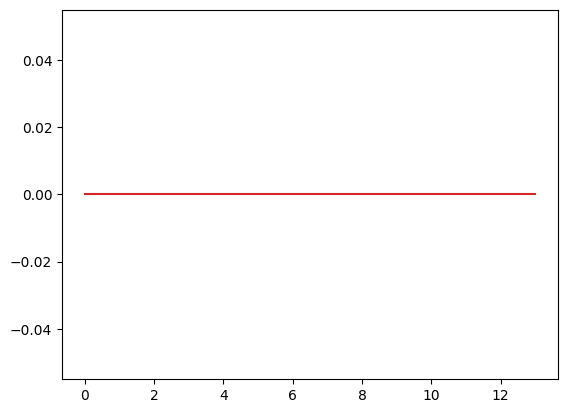

In [27]:
# import matplotlib.pyplot library 
import matplotlib.pyplot as plt 
  
plt.stem(e_cA_1[10])
print(len(e_cA_1[10]))

In [28]:
cA_1 = cA_1[~np.isnan(cA_1) & ~np.isinf(cA_1)]


In [29]:
(EH.SampEn(e_cA_1[10].dropna(), 2))
(EH.FuzzEn(e_cA_1[10]))

AssertionError: Sig:   must be a numpy vector

In [37]:
Sample_Entropy_epy =  []
Fuzzy_Entropy_epy =  []

for i in range(len(e_cA_1)):
    Sample_Entropy_epy.append(EH.SampEn(e_cA_1[i], 2))
    Fuzzy_Entropy_epy.append(EH.FuzzEn(e_cA_1[i]))

AssertionError: r:     must be a positive value

## Normal

In [13]:
path  = r"C:\Users\HP\OneDrive - Indian Institute of Technology Bhubaneswar\BTP_Drive\DATASET-2. VA2-20241204T052628Z-001\2. VA2\NE"

In [14]:
Normal = data_prep.extract(path)

11


In [15]:
n_cA_1= []
n_cA_2= []
n_cA_3= []
n_cA_4= []
n_cA_5= []

for i in range(len(Normal)):
    cA_1,cA_2,cA_3,cA_4,cA_5 = Normal[i]
    n_cA_1.append(cA_1)
    n_cA_2.append(cA_2)
    n_cA_3.append(cA_3)
    n_cA_4.append(cA_4)
    n_cA_5.append(cA_5)



In [16]:
len(n_cA_1)

11

##  DATA :

In [ ]:
Features = pd.DataFrame()


NameError: name 'pd' is not defined

In [25]:
cA_1=[]
for i in range(len(n_cA_1)):
    cA_1.append(n_cA_1[i])
for j in range(len(e_cA_1)):
    cA_1.append(e_cA_1[j])  



In [26]:
cA_2=[]
for i in range(len(n_cA_1)):
    cA_2.append(n_cA_2[i])
for j in range(len(e_cA_1)):
    cA_2.append(e_cA_2[j])  

In [27]:
cA_3=[]
for i in range(len(n_cA_1)):
    cA_3.append(n_cA_3[i])
for j in range(len(e_cA_1)):
    cA_3.append(e_cA_3[j])  